# Sprawozdanie Jan Bassa 120594 Drzewa decyzyjne

In [17]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import time
import joblib


# Zad 1
Przygotowanie środowiska

# Zad 2
Podział danych i bazowy model lasu losowego

In [13]:
# 1. Podział danych 80% / 20%
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

# 2. Trenowanie podstawowego modelu
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# 3. Ocena
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)

print("Accuracy (train):", train_acc)
print("Accuracy (test):", test_acc)


Accuracy (train): 1.0
Accuracy (test): 0.9


# Zad 3
Analiza wpływu podstawowych hiperparametrów

/tmp/ipykernel_1274819/1439092960.py:60: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  plt.plot(df_max_depth['max_depth'].replace("None", np.nan), df_max_depth['accuracy'], marker='o', label="Accuracy")


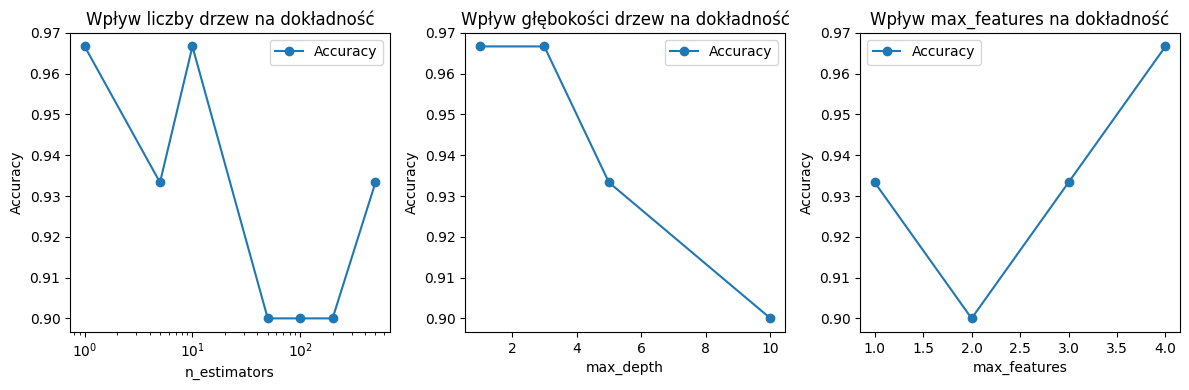

In [14]:
# Analiza wpływu n_estimators
n_estimators_range = [1, 5, 10, 50, 100, 200, 500]
results_n_estimators = []

for n in n_estimators_range:
    start_time = time.time()
    model = RandomForestClassifier(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    train_time = time.time() - start_time
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results_n_estimators.append((n, accuracy, train_time))

df_n_estimators = pd.DataFrame(results_n_estimators, columns=['n_estimators', 'accuracy', 'train_time'])

# Analiza wpływu max_depth
max_depth_range = [1, 3, 5, 10, None]
results_max_depth = []

for depth in max_depth_range:
    start_time = time.time()
    model = RandomForestClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    train_time = time.time() - start_time
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results_max_depth.append((depth if depth else "None", accuracy, train_time))

df_max_depth = pd.DataFrame(results_max_depth, columns=['max_depth', 'accuracy', 'train_time'])

# Analiza wpływu max_features
max_features_range = [1, 2, 3, 4] 
results_max_features = []

for features in max_features_range:
    start_time = time.time()
    model = RandomForestClassifier(max_features=features, random_state=42)
    model.fit(X_train, y_train)
    train_time = time.time() - start_time
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results_max_features.append((features, accuracy, train_time))

df_max_features = pd.DataFrame(results_max_features, columns=['max_features', 'accuracy', 'train_time'])

# Wizualizacja
plt.figure(figsize=(12, 4))

# Wykres dla n_estimators
plt.subplot(1, 3, 1)
plt.plot(df_n_estimators['n_estimators'], df_n_estimators['accuracy'], marker='o', label="Accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.title("Wpływ liczby drzew na dokładność")
plt.xscale("log")
plt.legend()

# Wykres dla max_depth
plt.subplot(1, 3, 2)
plt.plot(df_max_depth['max_depth'].replace("None", np.nan), df_max_depth['accuracy'], marker='o', label="Accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.title("Wpływ głębokości drzew na dokładność")
plt.legend()

# Wykres dla max_features
plt.subplot(1, 3, 3)
plt.plot(df_max_features['max_features'], df_max_features['accuracy'], marker='o', label="Accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.title("Wpływ max_features na dokładność")
plt.legend()

plt.tight_layout()
plt.show()

Jak widać na załączonym obrazku, dokładność w naszym przypadku jest odwrotnie proporcjonalna do głębii a wprost proporcjonalna do liczby cech. Jeśli chodzi o liczbe estymatorów to sytuacja waha się i maksimum osiąga przy 10 i 0

# Zad 4
Wykorzystanie Out-of-Bag (OOB) Score

In [18]:
# 1. Wczytanie danych
data = load_iris()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Trenowanie modelu z oob_score
rf = RandomForestClassifier(n_estimators=100, oob_score=True, bootstrap=True, random_state=42)
rf.fit(X_train, y_train)

# 3. Ocena modelu
if hasattr(rf, "oob_score_"):
    oob_score = rf.oob_score_
    print(f"OOB Score: {oob_score:.4f}")
else:
    print("Model nie obliczył OOB Score – sprawdź dane i hiperparametry.")

y_pred = rf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

# 4. Zapisanie modelu z wersjonowaniem
model_version = "model_v1.joblib"
joblib.dump(rf, model_version)
print(f"Model zapisany jako: {model_version}")

OOB Score: 0.9167
Test Accuracy: 1.0000
Model zapisany jako: model_v1.joblib


Out-of-Bag Score to wewnętrzna walidacja w Random Forest. Służy do oceny modelu bez potrzeby wydzielania zbioru walidacyjnego, wykorzystując próbki, które nie zostały użyte do trenowania poszczególnych drzew

# Zad 5
Znaczenie (importancja) cech

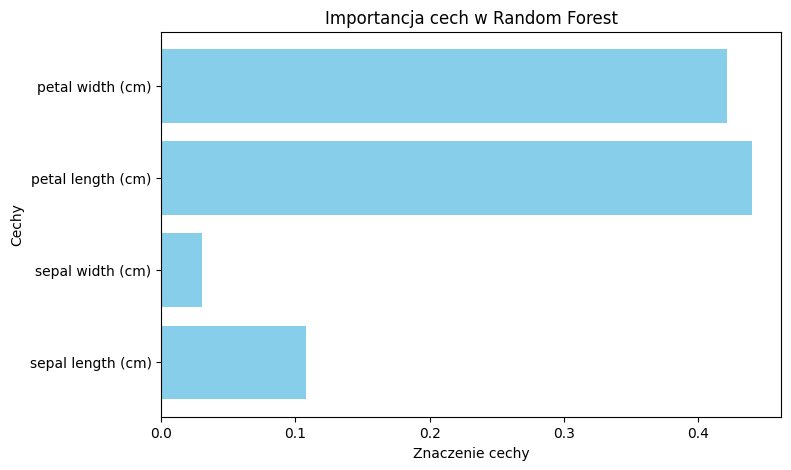

In [19]:
# 1. Wczytanie danych
data = load_iris()
X, y = data.data, data.target
feature_names = data.feature_names

# 2. Podział na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Trenowanie modelu z domyślnymi hiperparametrami
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 4. Pobranie znaczenia cech
feature_importances = rf.feature_importances_

# 5. Wizualizacja znaczenia cech
plt.figure(figsize=(8, 5))
plt.barh(feature_names, feature_importances, color="skyblue")
plt.xlabel("Znaczenie cechy")
plt.ylabel("Cechy")
plt.title("Importancja cech w Random Forest")
plt.show()